We try to use this sample code to visualize the distribution of sales across products.
https://stackoverflow.com/questions/66009115/3d-plot-of-multiple-time-series-in-python

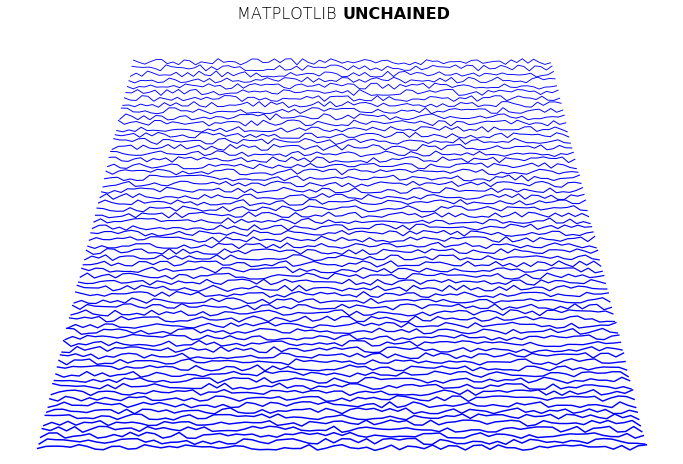

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# Create new Figure with black background
fig = plt.figure(figsize=(12, 8))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + data[i], color="b", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="k",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="k",
        family="sans-serif", fontweight="bold", fontsize=16)

def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

In [2]:
import pandas as pd
validation_data = pd.read_csv('../data/raw/walmart_sales_data/sales_train_validation.csv')
products_HOBBIES_1_001 = validation_data[validation_data["item_id"]=="HOBBIES_1_001"]
products_HOBBIES_1_001.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
3049,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,...,0,0,1,2,0,4,0,0,2,2
6098,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,...,0,2,4,0,1,1,1,0,3,3
9147,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,...,1,0,0,1,0,1,0,1,2,1
12196,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [3]:
products_HOBBIES_1_001 = products_HOBBIES_1_001.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)
products_HOBBIES_1_001.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
3049,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,4,0,0,2,2
6098,0,0,0,0,0,0,0,0,0,0,...,0,2,4,0,1,1,1,0,3,3
9147,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,2,1
12196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [6]:
products_HOBBIES_1_001.shape

(10, 1913)

In [4]:
products_HOBBIES_1_001_values = products_HOBBIES_1_001[:].values
print(products_HOBBIES_1_001_values)

[[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 2 2]
 [0 0 0 ... 0 3 3]
 ...
 [0 0 0 ... 2 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


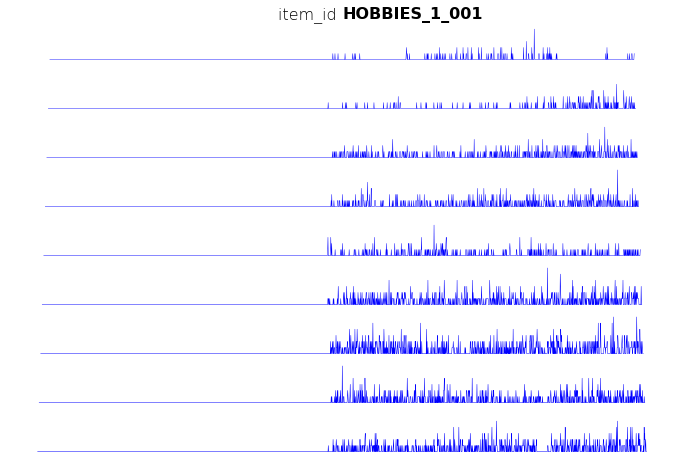

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# Create new Figure with black background
fig = plt.figure(figsize=(12, 8))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = products_HOBBIES_1_001_values
X = np.linspace(-1, 1, data.shape[-1])

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 0.5 - i / 100.0
    line, = ax.plot(xscale * X, i*8 + data[i], color="b", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "item_id ", transform=ax.transAxes,
        ha="right", va="bottom", color="k",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "HOBBIES_1_001", transform=ax.transAxes,
        ha="left", va="bottom", color="k",
        family="sans-serif", fontweight="bold", fontsize=16)

def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i*8 + data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

In [18]:
products_HOUSEHOLD_1_001 = validation_data[validation_data["item_id"]=="HOUSEHOLD_1_001"]
products_HOUSEHOLD_1_001 = products_HOUSEHOLD_1_001.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)
products_HOUSEHOLD_1_001_values = products_HOUSEHOLD_1_001[:].values

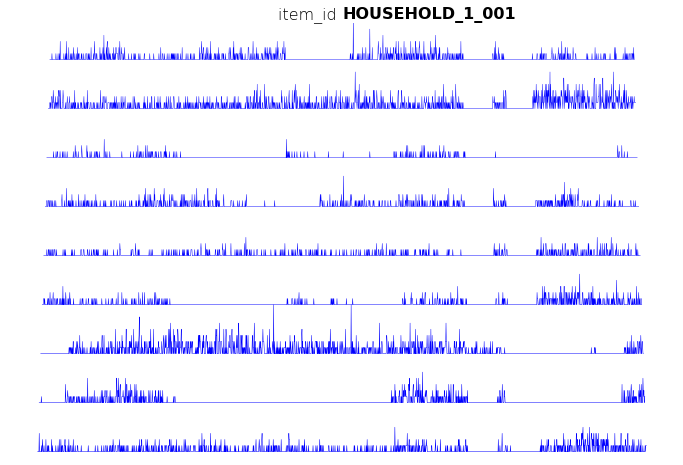

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# Create new Figure with black background
fig = plt.figure(figsize=(12, 8))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = products_HOUSEHOLD_1_001_values
X = np.linspace(-1, 1, data.shape[-1])

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 0.5 - i / 100.0
    line, = ax.plot(xscale * X, i*8 + data[i], color="b", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "item_id ", transform=ax.transAxes,
        ha="right", va="bottom", color="k",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "HOUSEHOLD_1_001", transform=ax.transAxes,
        ha="left", va="bottom", color="k",
        family="sans-serif", fontweight="bold", fontsize=16)

def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i*8 + data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

In [21]:
products_FOODS_1_001 = validation_data[validation_data["item_id"]=="FOODS_1_001"]
products_FOODS_1_001 = products_FOODS_1_001.drop(['id','item_id','dept_id','cat_id','store_id','state_id'], axis=1)
products_FOODS_1_001_values = products_FOODS_1_001[:].values

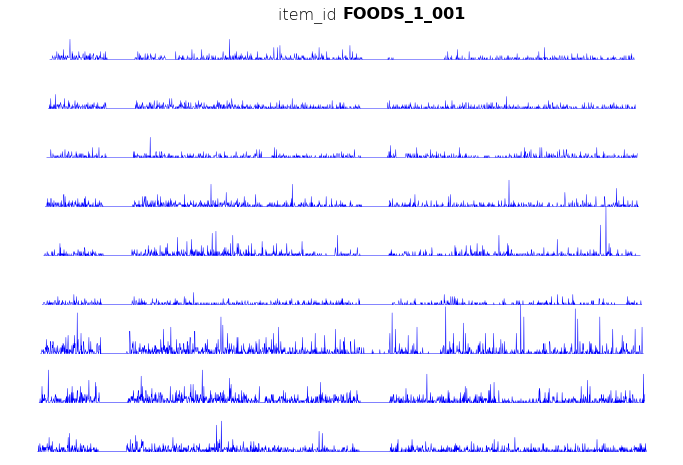

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# Create new Figure with black background
fig = plt.figure(figsize=(12, 8))

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = products_FOODS_1_001_values
X = np.linspace(-1, 1, data.shape[-1])

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 0.5 - i / 100.0
    line, = ax.plot(xscale * X, i*8 + data[i]/3, color="b", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "item_id ", transform=ax.transAxes,
        ha="right", va="bottom", color="k",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "FOODS_1_001", transform=ax.transAxes,
        ha="left", va="bottom", color="k",
        family="sans-serif", fontweight="bold", fontsize=16)

def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i*8 + data[i]/3)

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()